## DS Integrated Project 2:

### Project description:

Zyfra develops efficiency solutions for heavy industry.
* We are going to prepare a prototype of a machine learning model. 
* The model would predict the amount of gold recovered from gold ore, for that purpose we have data on extraction and purification processes.
* The model will help optimize the production and eliminate unprofitable parameters.

### Table of contents: 

* [1. Prepare the data](#1.-Prepare-the-data:)

    * [1.1. Open the files and look into the data](#1.1.-Open-the-files-and-look-into-the-data.)

    * [1.2. Check that recovery is calculated correctly](#1.2.-Check-that-recovery-is-calculated-correctly.)

    * [1.3. Analyze the features not available in the test set](#1.3.-Analyze-the-features-not-available-in-the-test-set.)

    * [1.4. Data preprocessing](#1.4.-Data-preprocessing.)

* [2. Data analysis](#2.-Data-analysis:)

    * [2.1. How the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.](#2.1.-How-the-concentrations-of-metals-(Au,-Ag,-Pb)-change-depending-on-the-purification-stage.)

    * [2.2. Comparison between the feed particle size distributions in the training set and in the test set](#2.2.-Comparison-between-the-feed-particle-size-distributions-in-the-training-set-and-in-the-test-set.)
    
    * [2.3. Comparison between the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate.](#2.3.-Comparison-between-the-total-concentrations-of-all-substances-at-different-stages-raw-feed,-rougher-concentrate,-and-final-concentrate.)
    
* [3. Develop and train a model](#3.-Develop-and-train-a-model:)
    
    * [3.1. Calculation of the final sMAPE value.](#3.1.-Calculation-of--final--the-sMAPE-value.) 
    
    * [3.2. Train, evaluation, finding, and testing to find the best model](#3.2.-Train,-evaluation,-finding-,-and-testing-to-find-the-best-model)

### 1. Prepare the data:

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import plotly.graph_objects as go
import plotly.express as px

from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

#### 1.1. Open the files and look into the data.

In [2]:
try:
    gold_train = pd.read_csv('gold_recovery_train.csv')
        
except:
    gold_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    
try:
    gold_test = pd.read_csv('gold_recovery_test.csv')
    
except:
    gold_test = pd.read_csv('/datasets/gold_recovery_test.csv')

try:
    gold_full = pd.read_csv('gold_recovery_full.csv')
    
except:
    gold_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
gold_train.head(4)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129


In [4]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
gold_test.head(4)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987


In [6]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [7]:
gold_full.sample(4)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
15138,2017-10-06 17:59:59,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,16.985673,-499.480024,15.097257,-399.774112,11.977199,-500.451825,8.999026,-499.979876,13.009877,-499.883635
13898,2017-08-16 01:59:59,3.923679,12.672608,6.300892,45.497218,61.753953,7.440456,3.825434,10.103439,2.992300,...,14.535670,-499.137945,10.853760,-400.044570,14.013937,-499.652484,11.026331,-500.070012,14.961535,-500.023738
20711,2018-05-26 22:59:59,3.339343,6.069585,4.296782,26.808137,72.281039,9.344683,1.762594,10.329573,2.506572,...,30.013430,-498.875773,20.076945,-499.854380,17.932788,-499.389924,13.999659,-499.443104,13.988534,-500.044621
932,2016-02-22 20:00:00,6.710100,12.376342,10.857932,38.203048,75.213831,13.042780,2.324336,9.944505,3.135507,...,14.069885,-399.115534,11.923876,-400.260193,11.935813,-400.025041,10.003031,-399.823749,32.037007,-400.001151


In [8]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


#### 1.2. Check that recovery is calculated correctly. 

* C - AG consentrate in the output stream 
* F - Ag consentrate in the feed stream 
* T - AG consentrate in the tail stream
* Calculate the recovery- how much gold has been recoverd

In [9]:
def recovery(C,F,T):
    rec = 100*((C*(F-T))/(F*(C-T)))
    return rec

In [10]:
df = gold_train.dropna()
C = df['rougher.output.concentrate_au']
F = df['rougher.input.feed_au']
T = df['rougher.output.tail_au']

In [11]:
recovery = recovery(C,F,T)

mae = mean_absolute_error(df['rougher.output.recovery'], recovery)
mae

9.460144184559453e-15

* Once the Nan values are ignored, MAE value is close to zero, which mean the Au calculated recovery is pretty close to the given recovery

#### 1.3. Analyze the features not available in the test set. 


In [12]:
gold_train_cols = gold_train.columns
gold_test_cols = gold_test.columns

common_cols = gold_train_cols.intersection(gold_test_cols)
train_not_test = gold_train_cols.difference(gold_test_cols)
train_not_test

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

* The test-set contains:
    * data on the feed stream for the first stage,
    * data about the substances in each pool,
* The test-set missing data about the output stream on stages:
    * final.output
    * primary_cleaner.output
    * rougher.calculation
    * rougher.output
    * secondary_cleaner.output

#### 1.4. Data preprocessing.

<img src="Image.jpg" >

In [13]:
x = gold_full.isnull().sum()/ len(gold_full)
x = x.sort_values(ascending = True)
x.describe()

count    87.000000
mean      0.018513
std       0.031835
min       0.000000
25%       0.003280
50%       0.004446
75%       0.015628
max       0.137304
dtype: float64

* At the 'rougher.output.recovery'  there are 13.7% of missing values, which is the maximum of missing values considering all the other columns. we should keep in mind the 'rougher.output.recovery' is one of the targets.
* we got almost 22.7k rows, describing measurement from Janury 2016- to July 2018, lets see if the dates are sorted, and if it's possible to fill the missing value from the next row.

In [15]:
# make sure the date column is sorted: 
# fig1 = px.line(gold_full,
#                x = gold_full.index,
#                y = gold_full['date'],
#                title="date per index")
# fig1.show()


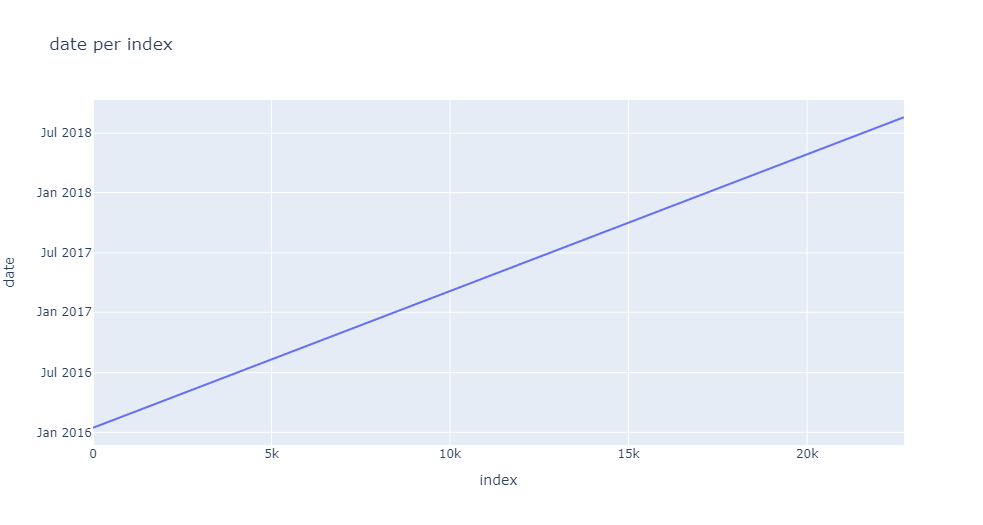

* The database provides information collected for each hour. By figure 1 the data measured consistently.
* It makes sense to fill the missing values by the next cell, the data for the next hour, after droping the row with Nan target. 


In [16]:
gold_full_relv = gold_full.dropna(subset=['rougher.output.concentrate_au', 'rougher.output.recovery'])
gold_train_relv = gold_train.dropna(subset=['rougher.output.concentrate_au', 'rougher.output.recovery'])

gold_full_relv = gold_full.fillna(method = 'ffill', axis = 0)
gold_train_relv = gold_train.fillna(method = 'ffill', axis = 0)
gold_test = gold_test.fillna(method = 'ffill', axis = 0)

print(gold_full_relv.info())
print(gold_train_relv.info())
print(gold_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22716 non-null  float64
 2   final.output.concentrate_pb                         22716 non-null  float64
 3   final.output.concentrate_sol                        22716 non-null  float64
 4   final.output.concentrate_au                         22716 non-null  float64
 5   final.output.recovery                               22716 non-null  float64
 6   final.output.tail_ag                                22716 non-null  float64
 7   final.output.tail_pb                                22716 non-null  float64
 8   final.output.tail_sol                               22716 non-null  float64


In [17]:
x = gold_full_relv.isnull().sum()/ len(gold_full_relv)
x = x.sort_values(ascending = True)
x.describe()

count    87.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [18]:
x = gold_train_relv.isnull().sum()/ len(gold_train_relv)
x = x.sort_values(ascending = True)
x.describe()

count    87.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [19]:
gold_full_relv[gold_full_relv.duplicated()]


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


* There's no duplicates in the data. 

### 2. Data analysis:

We have massive database, the feed stream data influance all the other columns in the data base, lets have a look on the feed stream data distribution:

In [20]:
feed_data = gold_full_relv[['date',
                       'rougher.input.feed_ag',
                       'rougher.input.feed_pb', 
                       'rougher.input.feed_au',
                       'rougher.input.feed_rate',
                       'rougher.input.feed_size', 
                       'rougher.input.feed_sol',
                       'rougher.input.floatbank10_sulfate', 
                       'rougher.input.floatbank10_xanthate',
                       'rougher.input.floatbank11_sulfate',
                       'rougher.input.floatbank11_xanthate']]
feed_data.shape

(22716, 11)

#### 2.1. How the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [22]:
# fig2 = go.Figure()
# fig2.add_trace(go.Histogram(x=gold_full_relv['rougher.input.feed_au'], 
#                             name = 'rougher.input.feed_au'))

# fig2.add_trace(go.Histogram(x=gold_full_relv['rougher.output.concentrate_au'], 
#                             name = 'rougher.output.concentrate_au'))

# fig2.add_trace(go.Histogram(x=gold_full_relv['primary_cleaner.output.concentrate_au'], 
#                             name = 'primary_cleaner.output.concentrate_au'))

# fig2.add_trace(go.Histogram(x=gold_full_relv['final.output.concentrate_au'], 
#                             name = 'final.output.concentrate_au'))


# fig2.update_layout(barmode='overlay')


# fig2.update_layout(yaxis_title = 'distribution',
#                    xaxis_title = 'Au Concentration',
#                    title_text="Au Concentrate distribution")

# fig2.update_traces(opacity=0.50)
# fig2.show()

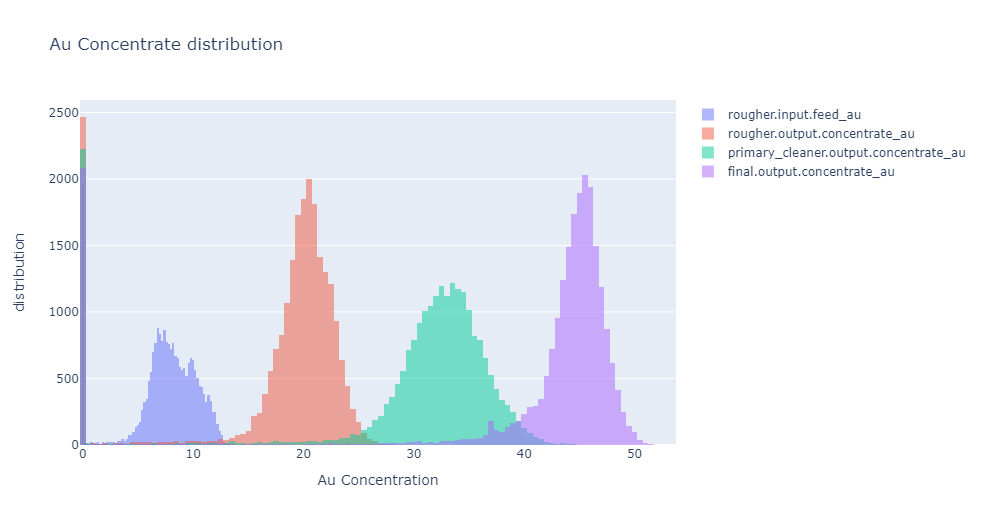

**Figur 2:**
There is concentration of 0 throughout the entire process.
In every step there are low concentrations that could mislead the model predictions. 
We can see increase of gold consentration throughout the process.
relevent Au concentrations:
* rougher-input: 3.3-12.9 
* rougher-output: 13.25-26
* primary-cleaner-output: 23-42
* final-output: 33-50

In [24]:
# fig3 = go.Figure()
# fig3.add_trace(go.Histogram(x=gold_full_relv['rougher.input.feed_ag'], 
#                             name = 'rougher.input.feed_ag'))

# fig3.add_trace(go.Histogram(x=gold_full_relv['rougher.output.concentrate_ag'], 
#                             name = 'rougher.output.concentrate_ag'))

# fig3.add_trace(go.Histogram(x=gold_full_relv['primary_cleaner.output.concentrate_ag'], 
#                             name = 'primary_cleaner.output.concentrate_ag'))

# fig3.add_trace(go.Histogram(x=gold_full_relv['final.output.concentrate_ag'], 
#                             name = 'final.output.concentrate_ag'))

# fig3.update_layout(barmode='overlay')


# fig3.update_layout(yaxis_title = 'distribution',
#                    xaxis_title = 'Ag Concentrate',
#                    title_text="Ag Concentrate distribution")

# fig3.update_traces(opacity=0.50)
# fig3.show()

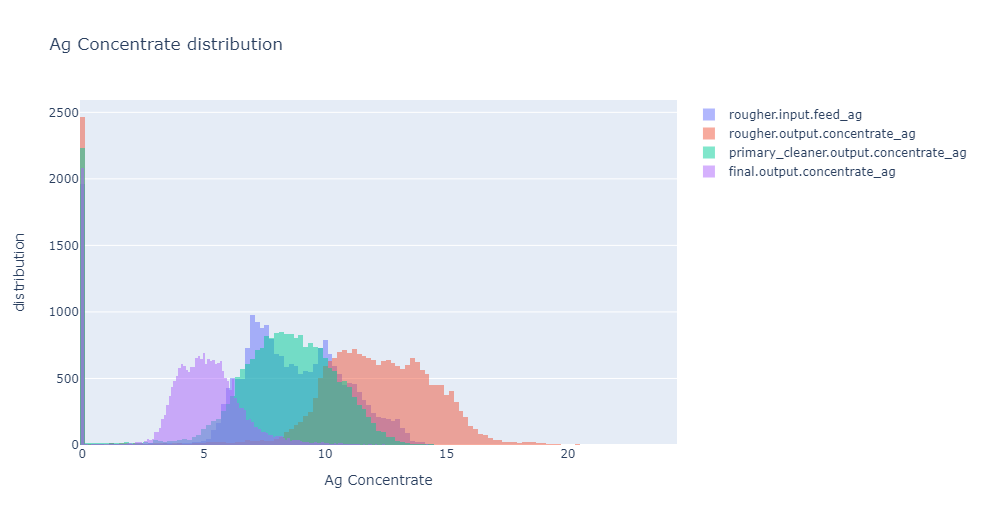

**Figur 3:**
There is concentration of 0 throughout the entire process.
In every step there are low concentrations that could mislead the model predictions. 
We can see increas in the Au consentration trough the first and the seconde stage, and decrease through the last 2 stages, we should check thae tail streame to find the remain Au.

relevent Ag concentrations:
* rougher-input: 4.5-14
* rougher-output: 7-17
* primary-cleaner-output: 3.7-14
* final-output: 3-9

In [26]:
# fig4 = go.Figure()
# fig4.add_trace(go.Histogram(x=gold_full_relv['rougher.input.feed_pb'], 
#                             name = 'rougher.input.feed_pb'))

# fig4.add_trace(go.Histogram(x=gold_full_relv['rougher.output.concentrate_pb'], 
#                             name = 'rougher.output.concentrate_pb'))

# fig4.add_trace(go.Histogram(x=gold_full_relv['primary_cleaner.output.concentrate_pb'], 
#                             name = 'primary_cleaner.output.concentrate_pb'))

# fig4.add_trace(go.Histogram(x=gold_full_relv['final.output.concentrate_pb'], 
#                             name = 'final.output.concentrate_pb'))


# fig4.update_layout(barmode='overlay')


# fig4.update_layout(yaxis_title = 'distribution',
#                    xaxis_title = 'Pb Concentrate',
#                    title_text="Pb Concentrate distribution")

# fig4.update_traces(opacity=0.50)
# fig4.show()

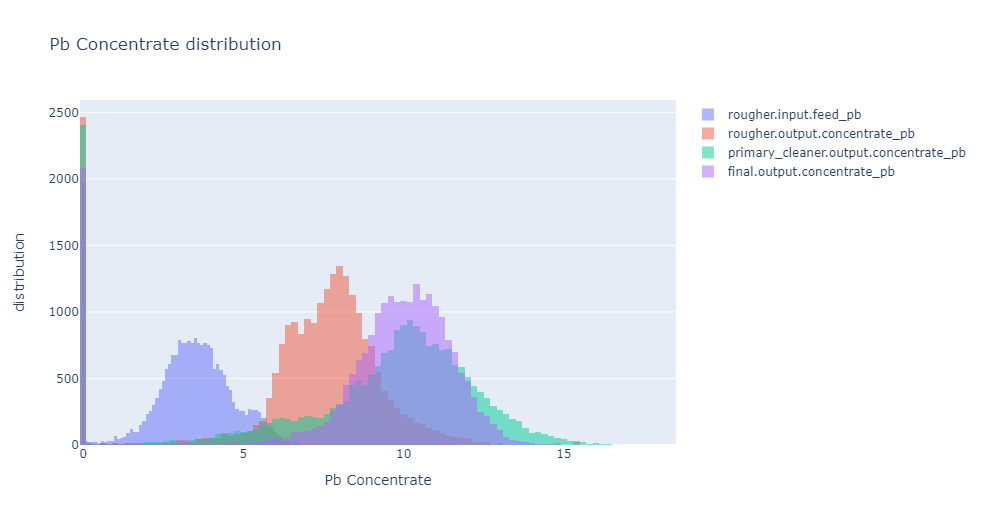

**Figur 4:**
There is concentration of 0 throughout the entire process.
In every step there are low concentrations that could mislead the model predictions. 
The Pb concentration going up in the first and the seconde stages and stabilized around 10 in the last two stages.  
relevent Pb concentrations:
* rougher-input: 1- 6.5
* rougher-output: 4-12
* primary-cleaner-output: 4-15
* final-output: 5.5-13

#### 2.2. Comparison between the feed particle size distributions in the training set and in the test set.
If the distributions vary significantly, the model evaluation will be incorrect.

In [28]:
# fig5 = go.Figure()
# fig5.add_trace(go.Histogram(x=gold_train_relv['rougher.input.feed_size'], name = 'rougher_input_gold_train', histnorm='density'))
# fig5.add_trace(go.Histogram(x=gold_test['rougher.input.feed_size'], name = 'rougher_input_gold_test', histnorm='density'))


# fig5.update_layout(barmode='overlay')

# fig5.update_layout(yaxis_title = 'distribution',
#                    xaxis_title = 'particle size',
#                    title_text="train & test particle size distribution on rougher.input")

# fig5.update_traces(opacity=0.50)
# fig5.show()

# fig6 = go.Figure()
# fig6.add_trace(go.Histogram(x=gold_train_relv['primary_cleaner.input.feed_size'], name = 'primary_cleaner_input_gold_train', histnorm='density'))
# fig6.add_trace(go.Histogram(x=gold_test['primary_cleaner.input.feed_size'], name = 'primary_cleaner_input_gold_test', histnorm='density'))


# fig6.update_layout(barmode='overlay')

# fig6.update_layout(yaxis_title = 'distribution',
#                    xaxis_title = 'particle size',
#                    title_text="train & test particle size distribution primary_cleaner_input")

# fig6.update_traces(opacity=0.50)
# fig6.show()

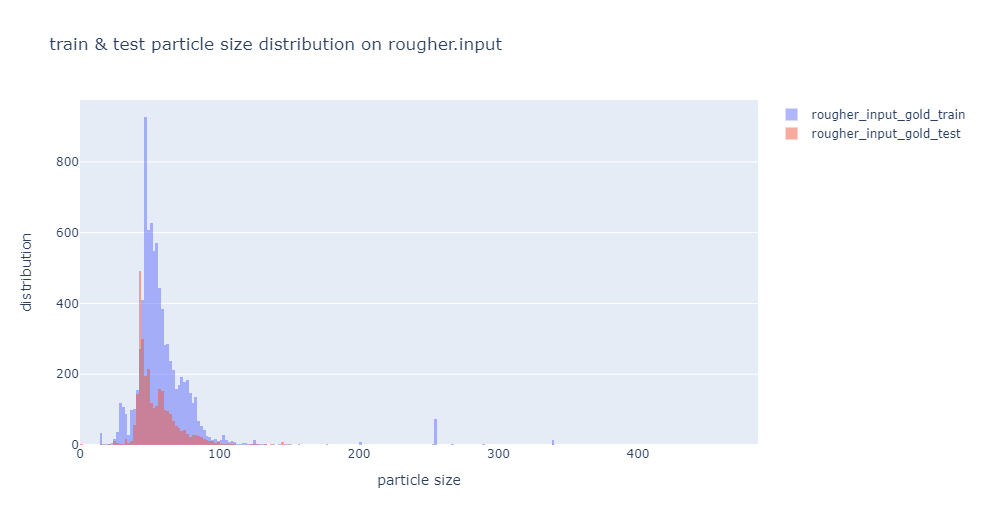

**Figur 5:**
The partical size for the rougher.input, in the test set, and in the train set have similar distribution. 
The partical size is between 24-100 for both train and test set. 



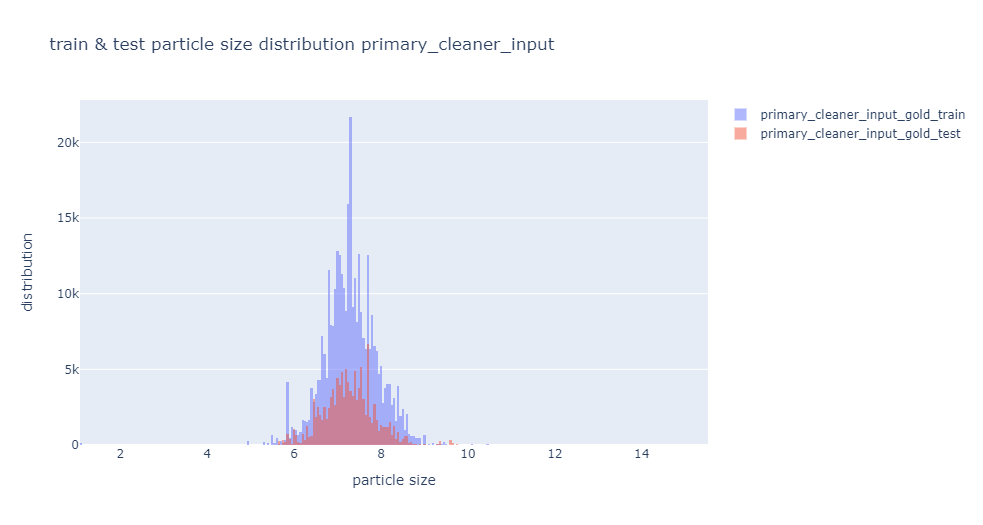

**Figur 6:**
The partical size for the primary_cleaner.input, in the test set, and in the train set have similar distribution. 
The partical size is between 6-9 for both train and test set. 

#### 2.3. Comparison between the total concentrations of all substances at different stages raw feed, rougher concentrate, and final concentrate. 


<img src="reco.jpg" >

* By looking at the  recovery equation we can see that when F > 0 or C != T or the equation is not define. 
* C and T streams are part of the target that needs to be predicted.
    * F the feed stream 
    * C the concentrate stream 
    * T the tail stream
* By lookin at figures 2,3,4 that conclusion is being established.
* There are some abnormal values in the rougher.input test set, and in the primary_cleaner train set.
* Im assuming that once we remove the problematic observation from the rougher.input, the source of the problem would disappear:
    * relevent Au concentrations for rougher-input: 3.3 - 12.9 
    * relevent Ag concentrations for rougher-input: 4.5-14
    * relevent Pb concentrations for rougher-input: 1- 6.5

In [29]:
# finding the 0.9 quantile and the 0.1 quantile for outliers indication:
roug_input_au_bottom = gold_train_relv['rougher.input.feed_au'].quantile(0.10)
roug_input_au_top = gold_train_relv['rougher.input.feed_au'].quantile(0.90)

print('rougher.input.feed_au 10 quantile: ', roug_input_au_bottom)
print('rougher.input.feed_au 90 quantile: ', roug_input_au_top)

roug_input_ag_bottom = gold_train_relv['rougher.input.feed_ag'].quantile(0.10)
roug_input_ag_top = gold_train_relv['rougher.input.feed_ag'].quantile(0.90)

print('rougher.input.feed_ag 10 quantile: ', roug_input_ag_bottom)
print('rougher.input.feed_ag 90 quantile: ', roug_input_ag_top)

roug_input_pb_bottom = gold_train_relv['rougher.input.feed_pb'].quantile(0.10)
roug_input_pb_top = gold_train_relv['rougher.input.feed_pb'].quantile(0.90)

print('rougher.input.feed_pb 10 quantile: ', roug_input_pb_bottom)
print('rougher.input.feed_pb 90 quantile: ', roug_input_pb_top)

roug_input_size_bottom = gold_train_relv['rougher.input.feed_size'].quantile(0.05)
roug_input_size_top = gold_train_relv['rougher.input.feed_size'].quantile(0.95)

print('rougher.input.feed_size 10 quantile: ', roug_input_size_bottom)
print('rougher.input.feed_size 90 quantile: ', roug_input_size_top)

rougher.input.feed_au 10 quantile:  1.3443909431294503
rougher.input.feed_au 90 quantile:  10.708693756206651
rougher.input.feed_ag 10 quantile:  3.3148185295383032
rougher.input.feed_ag 90 quantile:  11.405949740265404
rougher.input.feed_pb 10 quantile:  0.48544452192414467
rougher.input.feed_pb 90 quantile:  5.0314761013189955
rougher.input.feed_size 10 quantile:  34.15464652510703
rougher.input.feed_size 90 quantile:  87.7530998373283


In [30]:
# removing the outliers in the train set: 
con1 = gold_train_relv.loc[gold_train_relv['rougher.input.feed_au'] > roug_input_au_bottom]['date']
con2 = gold_train_relv.loc[gold_train_relv['rougher.input.feed_au'] < roug_input_au_top]['date']

con3 = gold_train_relv.loc[gold_train_relv['rougher.input.feed_ag'] > roug_input_ag_bottom]['date']
con4 = gold_train.loc[gold_train_relv['rougher.input.feed_ag'] < roug_input_ag_top]['date']

con5 = gold_train_relv.loc[gold_train_relv['rougher.input.feed_pb'] > roug_input_pb_bottom]['date']
con6 = gold_train_relv.loc[gold_train_relv['rougher.input.feed_pb'] < roug_input_pb_top]['date']

con7 = gold_train_relv.loc[gold_train_relv['rougher.output.tail_au'] < gold_train['rougher.output.concentrate_au']]['date']
con8 = gold_train_relv.loc[gold_train_relv['final.output.tail_au'] < gold_train['final.output.concentrate_au']]['date']

con9 = gold_train_relv.loc[gold_train_relv['rougher.input.feed_size'] > roug_input_size_bottom]['date']
con10 = gold_train_relv.loc[gold_train_relv['rougher.input.feed_size'] < roug_input_size_top]['date']

gold_train_relv = gold_train_relv.query('date in @con1 & date in @con2 & date in @con3 & date in @con4 & date in @con5 & date in @con6 & date in @con7 & date in @con8 & date in @con9 & date in @con10')
gold_train_relv.shape

(11159, 87)

In [31]:
# removing the outliers in the test set: 
con_1 = gold_test.loc[gold_test['rougher.input.feed_au'] > roug_input_au_bottom]['date']
con_2 = gold_test.loc[gold_test['rougher.input.feed_au'] < roug_input_au_top]['date']

con_3 = gold_test.loc[gold_test['rougher.input.feed_ag'] > roug_input_ag_bottom]['date']
con_4 = gold_test.loc[gold_test['rougher.input.feed_ag'] < roug_input_ag_top]['date']

con_5 = gold_test.loc[gold_test['rougher.input.feed_pb'] > roug_input_pb_bottom]['date']
con_6 = gold_test.loc[gold_test['rougher.input.feed_pb'] < roug_input_pb_top]['date']

con_7 = gold_test.loc[gold_test['rougher.input.feed_size'] >roug_input_size_bottom]['date']
con_8 = gold_test.loc[gold_test['rougher.input.feed_size'] < roug_input_size_top]['date']

gold_test_relv = gold_test.query('date in @con_1 & date in @con_2 & date in @con_3 & date in @con_4 & date in @con_5 & date in @con_6 & date in @con_7 & date in @con_8')
gold_test_relv.shape

(3923, 53)

In [32]:
full_ag_feed_sum = gold_full_relv['rougher.input.feed_ag'].sum()
full_ag_middle_sum = gold_full_relv['rougher.output.concentrate_ag'].sum()
full_ag_final_sum = gold_full_relv['final.output.concentrate_ag'].sum()

full_pb_feed_sum = gold_full_relv['rougher.input.feed_pb'].sum()
full_pb_middle_sum = gold_full_relv['rougher.output.concentrate_pb'].sum()
full_pb_final_sum = gold_full_relv['final.output.concentrate_pb'].sum()

full_au_middle_sum = gold_full_relv['rougher.output.concentrate_au'].sum()
full_au_feed_sum = gold_full_relv['rougher.input.feed_au'].sum()
full_au_final_sum = gold_full_relv['final.output.concentrate_au'].sum()

sum_metel_stage = [['feed', full_ag_feed_sum, full_pb_feed_sum, full_au_feed_sum], 
                   ['middle', full_ag_middle_sum, full_pb_middle_sum, full_au_middle_sum], 
                   ['final',full_ag_final_sum , full_pb_final_sum, full_au_final_sum]]
sum_metel_stage = pd.DataFrame(sum_metel_stage, columns = ['stage', 'Ag', 'Pb', 'Au'])
sum_metel_stage

,stage,Ag,Pb,Au
0,feed,182732.898021,74575.380942,171411.780412
1,middle,246368.863860,156442.126750,405060.555729
2,final,108310.180492,206065.154798,906180.262071


In [34]:
# fig7 = px.line(sum_metel_stage, x='stage', y=['Ag', 'Pb', 'Au'], markers=True)
# fig7.update_layout(title='Sum of metal concentration in each stage',
#                    xaxis_title='stage',
#                    yaxis_title='sum of concentration')
# fig7.show()

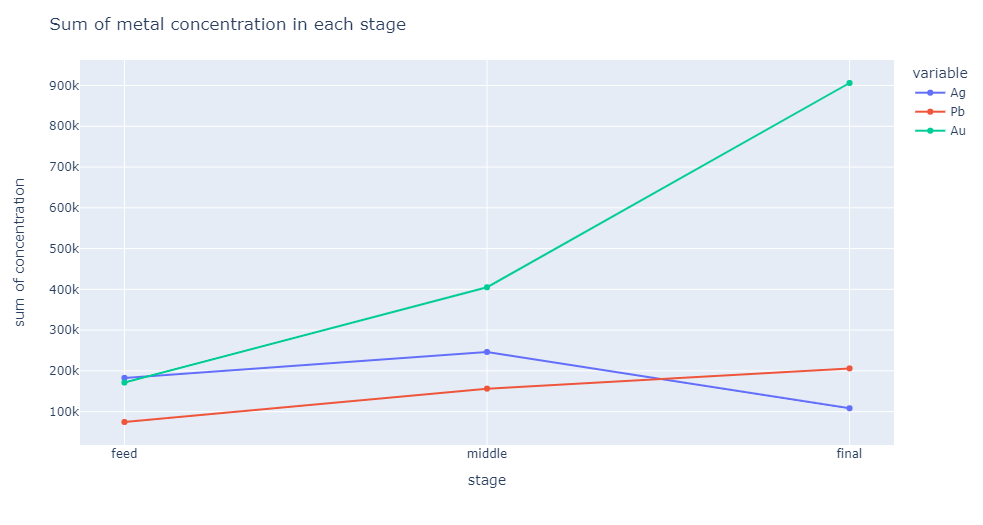

**figur7:**
* The Au concentartion increas by the different stages- its The desired outcome.
* The Pb concentartion increas by the different stages, in lower magnitude, but its not the metal we are trying to extricate, its not seems like a problam. 
* The Ag concentartion increas by the first stage and decreas even lower by the final stage. its not the metal we are trying to extricate, its probably in the tail sreame. 

### 3. Develop and train a model: 

**Train model for the rougher stage:**

* Im using the gold_test columns as features, so there wont be Target leakage, and features without outliears.

In [35]:
x_train = gold_train_relv[gold_test_relv.columns].drop(['date'], axis=1).to_numpy()
x_test = gold_test_relv.drop(['date'], axis=1).to_numpy()
print('x_train', x_train.shape)
print('x_test', x_test.shape)

x_train (11159, 52)
x_test (3923, 52)


* The target(y) contain two columns one for each stage:

In [36]:
train_date = gold_train_relv['date']
y_train = gold_full_relv.query('date in @train_date')[['rougher.output.recovery', 'final.output.recovery']]
y_train = y_train.to_numpy()


In [37]:
test_date = gold_test_relv['date']
y_test = gold_full_relv.query('date in @test_date')[['rougher.output.recovery', 'final.output.recovery']]
y_test = y_test.to_numpy()

In [38]:
scaler = StandardScaler()
scaler.fit(x_train) 
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### 3.1. Calculation of  final  the sMAPE value.

* calc_smape gets the 2D arreys for prediction and targets, the first column for rogher stage, and seconde column for the final stage. the function calculate and return final sMAPE value wich is the the sum of:
* 0.25 x sMAPe(rogher_stage) + 0.75 x (sMAPe(final_stage)

In [39]:
def calc_smape (pred, target):
    sum_r = 0
    sum_f = 0
    length = len(pred)
    for i in range(length):
        num_r = abs(pred[i,0]- target[i,0])
        num_f = abs(pred[i,1]- target[i,1])
        
        den_r = 0.5*(abs(pred[i,0])+abs(target[i,0]))
        den_f = 0.5*(abs(pred[i,1])+abs(target[i,1]))
        
        sum_r += num_r/den_r
        sum_f +=num_f/den_f
        
    smape = 100*((0.25*sum_r/length) + (0.75*sum_r/length))
    return smape

In [40]:
smape_score = make_scorer(calc_smape) 

scores_lr = cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring=smape_score)
scores_lr

array([ 8.41477017, 10.81725863,  7.17038098,  5.41195509,  9.5003885 ])

In [41]:
scores_lr.mean()

8.262950675137256

* After removing all the outliers, and train the LinearRegression model, to predict the recovery fot rougher stage(25%) and for the final stage(75%), we got sMAPE (symmetric mean absolute percentage error) of 8.2, with 5 fold.   

**Check the sMAPE score for DummyRegressor with mean strategy:**

In [42]:
scores_Dummy = cross_val_score(DummyRegressor(strategy="mean"), x_train, y_train, cv=5, scoring=smape_score)
scores_Dummy

array([9.07603011, 9.23656206, 4.58798589, 7.49108679, 9.45208152])

In [43]:
scores_Dummy.mean()

7.968749274603115

* The sMAPE score for the DummyRegressor with mean strategy is 7.96 which is lower then the LinearRegression model result. 

#### 3.2. Train, evaluation, finding , and testing to find the best model


In [44]:
# train RandomForestRegressor and change the n_estimators hyper parameter:
estimatores = [10, 15, 18, 20, 25]
for n in estimatores:
    scores_rf = cross_val_score(RandomForestRegressor(n_estimators = n), x_train, y_train, cv=5, scoring=smape_score)


    print('for n_estimators =', n)
    print('sMAPE=', scores_rf)
    print('mean score', scores_rf.mean())
    print()

for n_estimators = 10
sMAPE= [8.59456317 9.92975237 5.98408327 7.14112441 7.91400189]
mean score 7.912705022885166

for n_estimators = 15
sMAPE= [9.6615137  9.25394711 5.46126854 8.15212708 8.10407206]
mean score 8.126585699550239

for n_estimators = 18
sMAPE= [8.64635528 8.18858437 5.05977759 7.10248517 8.21824988]
mean score 7.4430904586209365

for n_estimators = 20
sMAPE= [8.78346372 8.97984612 4.79525339 8.7304648  7.78284689]
mean score 7.814374984001364

for n_estimators = 25
sMAPE= [8.39001928 9.98410013 5.11487448 8.60807787 7.16994437]
mean score 7.853403225659368



* By changing n_estimators hyper parameter, we got the best sMAPE for 10 estimators(7.91), it the lowest score we got so far.

**We got the lowest sMAPE score for random forest with 10 estimators, lets see what is the test set sMAPE:**

* get_pred gets the desired model and train it for X_train, y_train and return the prediction for X_test:

In [46]:
def get_pred(model, X_train, X_test, y_train):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

In [50]:
pred_test_rf = get_pred(RandomForestRegressor(n_estimators = 10), x_train, x_test, y_train)
smape_rf = calc_smape (pred_test_rf, y_test)
smape_rf

9.730081400070645

In [69]:
pred_test_dummy = get_pred(DummyRegressor(strategy="mean"), x_train, x_test, y_train)
smape_dummy = calc_smape (pred_test_dummy, y_test)
smape_dummy

9.81259898925038

* RandomForestRegressor with 10 estimators had the loest sMAPE(7.9)
* For the test set, RandomForestRegressor with 25 estimators, yield sMAPE score of 9.7 
* DummyRegressor with "mean" strategy yield higher sMAPE score of 9.8 
* To conclude we manage to train a model that predict the amount of gold recovered from gold ore with loss function value of 9.7. 